In [182]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.collections import LineCollection
from scipy.spatial import ConvexHull

In [269]:
points = np.array([[0, 0], [1, 1.5], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
points = np.random.rand(300, 2)
vor = Voronoi(points)
# vor.points

In [304]:
def _adjust_bounds(ax, points):
    margin = 0.1 * points.ptp(axis=0)
    xy_min = points.min(axis=0) - margin
    xy_max = points.max(axis=0) + margin
    ax.set_xlim(xy_min[0], xy_max[0])
    ax.set_ylim(xy_min[1], xy_max[1])
    
def my_voronoi_plot_2d(vor, ax=None, **kw):
    """
    Plot the given Voronoi diagram in 2-D
    Parameters
    ----------
    vor : scipy.spatial.Voronoi instance
        Diagram to plot
    ax : matplotlib.axes.Axes instance, optional
        Axes to plot on
    show_points : bool, optional
        Add the Voronoi points to the plot.
    show_vertices : bool, optional
        Add the Voronoi vertices to the plot.
    line_colors : string, optional
        Specifies the line color for polygon boundaries
    line_width : float, optional
        Specifies the line width for polygon boundaries
    line_alpha : float, optional
        Specifies the line alpha for polygon boundaries
    point_size : float, optional
        Specifies the size of points
    Returns
    -------
    fig : matplotlib.figure.Figure instance
        Figure for the plot
    """

    if vor.points.shape[1] != 2:
        raise ValueError("Voronoi diagram is not 2-D")

    if kw.get('show_points', True):
        point_size = kw.get('point_size', None)
        ax.plot(vor.points[:, 0], vor.points[:, 1], '.', markersize=point_size)
    if kw.get('show_vertices', True):
        ax.plot(vor.vertices[:, 0], vor.vertices[:, 1], 'o')
        
    

    line_colors = kw.get('line_colors', 'k')
    line_width = kw.get('line_width', 1.0)
    line_alpha = kw.get('line_alpha', 1.0)
    
    center = vor.points.mean(axis=0)
    ptp_bound = vor.points.ptp(axis=0)
    # return
    for point in range(vor.points.shape[0]):
        finite_segments = set()
        infinite_segments = set()
        ridge_points = [p for p in vor.ridge_points if point in p]
        ridge_vertices = [v for p, v in zip(vor.ridge_points, vor.ridge_vertices) if point in p]

        for pointidx, simplex in zip(ridge_points, ridge_vertices):
            simplex = np.asarray(simplex)
            if np.all(simplex >= 0):
                for i in simplex:                    
                    finite_segments.add(tuple(vor.vertices[i]))
            else:
                i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
                t = vor.points[pointidx[1]] - vor.points[pointidx[0]]  # tangent
                t /= np.linalg.norm(t)
                n = np.array([-t[1], t[0]])  # normal

                midpoint = vor.points[pointidx].mean(axis=0)
                direction = np.sign(np.dot(midpoint - center, n)) * n
                if (vor.furthest_site):
                    direction = -direction
                far_point = vor.vertices[i] + direction * ptp_bound.max()                
                infinite_segments.add(tuple(vor.vertices[i]))
                infinite_segments.add(tuple(far_point))
        
        polygon_points = np.array(list(finite_segments) + list(infinite_segments))
        # polygon_points = polygon_points.clip(-0.1, 1.1)
        hull = ConvexHull(polygon_points)
        
        ax.fill(polygon_points[hull.vertices, 0], polygon_points[hull.vertices, 1], alpha=0.5, )
    # return
    _adjust_bounds(ax, vor.points)

    return

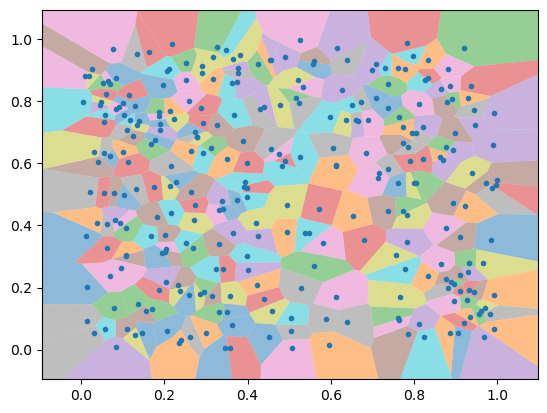

In [306]:
fig , ax = plt.subplots(nrows=1, ncols=1)
my_voronoi_plot_2d(vor, ax=ax,line_colors='orange', 
                   show_vertices=False, show_points=True)
